In [1]:
! pip install numpy
! pip install i pandas
! pip install scikit-learn
! pip install matplotlib
! pip install seaborn
! pip install tensorflow
! pip install nltk
! pip install wordcloud


In [2]:
# Deep learning
from keras.models import Sequential
from keras.layers import Embedding,Dropout,LSTM,Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [3]:
# machine learning
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import pickle
import seaborn as sns
from nltk.stem import PorterStemmer
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
train_data = pd.read_csv("train.txt",header=None,sep=";",names=["comment","Emotion"],encoding="utf")

In [5]:
train_data

,comment,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [6]:
train_data["length"] = [len(x) for x in train_data["comment"]]

In [7]:
train_data

,comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,101
15996,i am now turning and i feel pathetic that i am...,sadness,102
15997,i feel strong and good overall,joy,30
15998,i feel like this was such a rude comment and i...,anger,59


In [8]:
train_data.shape

(16000, 3)

In [9]:
train_data.isnull().sum()

,0
comment,0
Emotion,0
length,0


In [10]:
train_data.duplicated().sum()

1

In [11]:
train_data.drop_duplicates(inplace=True)

In [12]:
# EDA

In [13]:
train_data["Emotion"].value_counts()

,count
Emotion,
joy,5361
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


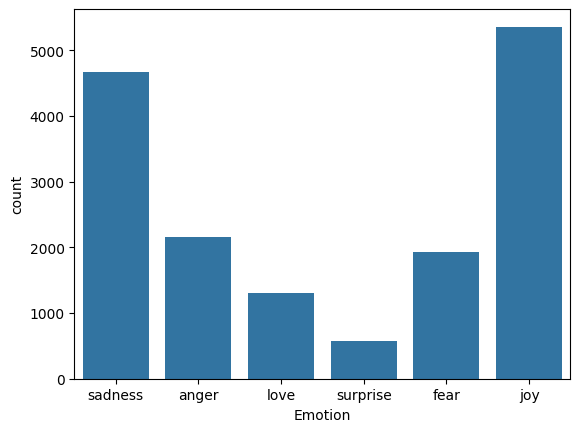

In [14]:
sns.countplot(x=train_data["Emotion"])
plt.show()

In [15]:
df2 = train_data.copy()
df2["length"].values

array([ 23, 108,  48, ...,  30,  59,  62])

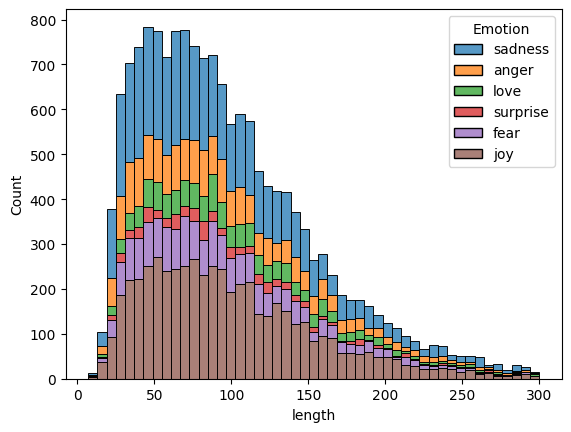

In [16]:
sns.histplot(data=df2,x="length",hue="Emotion",multiple="stack")
plt.show()

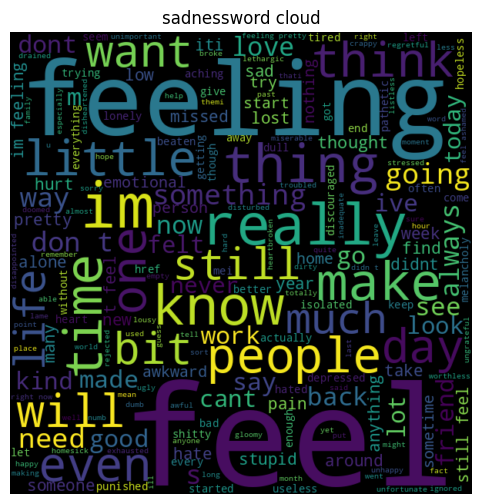

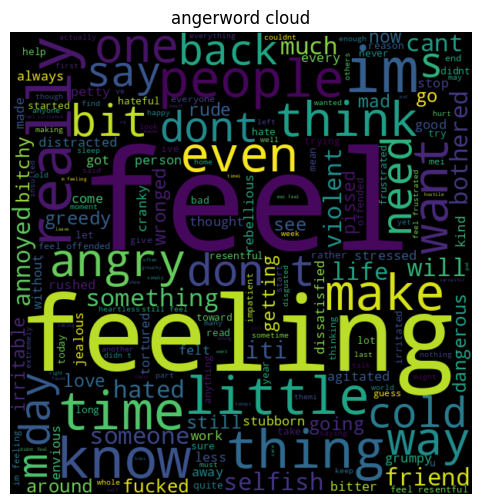

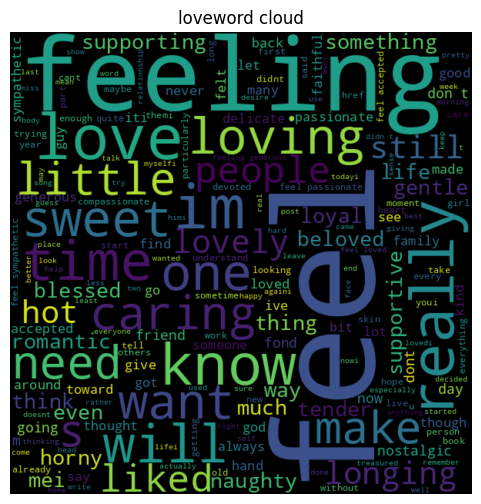

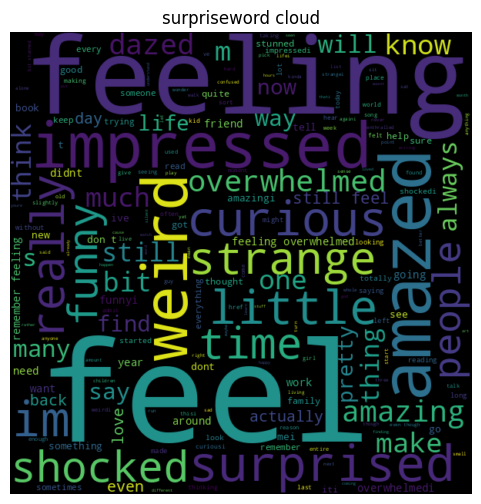

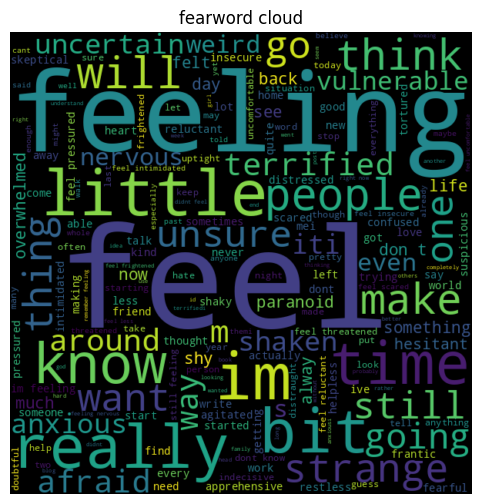

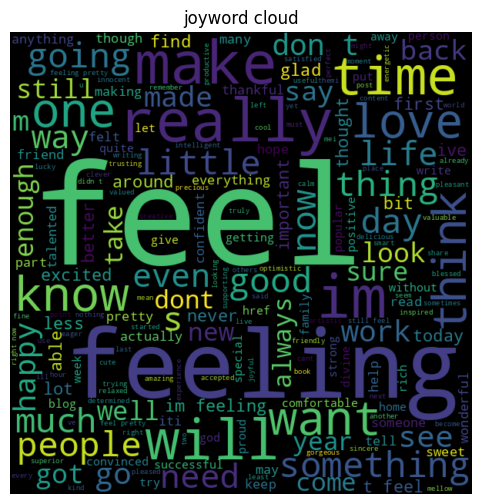

In [17]:
def word_cloud(wordcloud,df):
    plt.figure(figsize=(6,6))
    plt.title(emotion+"word cloud")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

emotion_list = train_data["Emotion"].unique()

for emotion in emotion_list:
       text =  "".join( sentence for sentence in train_data.loc[train_data["Emotion"]==emotion,"comment"])
       wc = WordCloud(width=600,height=600).generate(text)
       word_cloud(wc,emotion)


In [18]:
lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])

In [19]:
train_data

,comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20
...,...,...,...
15995,i just had a very brief time in the beanbag an...,4,101
15996,i am now turning and i feel pathetic that i am...,4,102
15997,i feel strong and good overall,2,30
15998,i feel like this was such a rude comment and i...,0,59


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [21]:
df = train_data.copy()

In [23]:
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
def clean_text(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]", " ", text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)

df['cleaned_comment'] = df['comment'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_comment'],df['Emotion'],test_size=0.2,random_state=42)

In [25]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
}

for name, clf in classifiers.items():
    print(f"\n===== {name} =====")
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"\nAccuracy using TF-IDF: {accuracy_tfidf}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred_tfidf))

In [ ]:
import pickle
pickle.dump(lg,open("logistic_regression,pkl","wb"))
pickle.dump(lb,open("label_encoder.pkl","wb"))
pickle.dump(tfidf_vectorizer,open("tfidf_vectorizer.pkl","wb"))

In [ ]:
import sklearn
print(sklearn.__version__) 

In [ ]:

def text_cleaning(df, column, vocab_size, max_len):
    stemmer = PorterStemmer()
    corpus = []

    for text in df[column]:
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)

    one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding='pre')
    return pad


x_train = text_cleaning(train_data, "comment", vocab_size=11000, max_len=300)
y_train = to_categorical(train_data["Emotion"])